## Observations and Insights 

In [71]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [34]:
# Checking the number of mice.
mouse_number = len(combined_data["Mouse ID"].unique())
print(f"There are {mouse_number} mice in the experiment.")

There are 249 mice in the experiment.


In [35]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_mice = combined_data[combined_data.duplicated(subset=['Mouse ID','Timepoint'], keep=False)]

In [36]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [37]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_df=combined_data[combined_data["Mouse ID"].isin(duplicated_mice) == False]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [38]:
# Checking the number of mice in the clean DataFrame.
mouse_number = len(clean_df["Mouse ID"].unique())
print(f"There are {mouse_number} mice in the experiment after removing the duplicated mouse ID and timepoint.")

There are 249 mice in the experiment after removing the duplicated mouse ID and timepoint.


## Summary Statistics

In [39]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

summary_df = combined_data[["Mouse ID","Drug Regimen","Tumor Volume (mm3)"]].copy() 

# group by Drug Regimen 
summary_df = summary_df.groupby(["Drug Regimen"])

# calculate mean
t_mean = summary_df["Tumor Volume (mm3)"].mean()

# calculate median
t_median = summary_df["Tumor Volume (mm3)"].median()

# calculate variance
t_variance = summary_df["Tumor Volume (mm3)"].var()

# calculate standard deviation
t_sd = summary_df["Tumor Volume (mm3)"].std()

# calculate SEM
t_sem = summary_df["Tumor Volume (mm3)"].sem()

In [40]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function

# Creating a new DataFrame 
sum_stat_df = pd.DataFrame({"Mean": t_mean,
                           "Median": t_median,
                           "Variance": t_variance,
                           "SD": t_sd,
                           "SEM": t_sem
                           })


sum_stat_df

,Mean,Median,Variance,SD,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

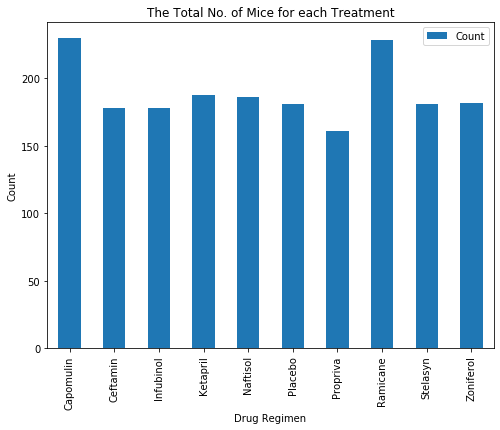

In [61]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

# calculate count
t_count = summary_df["Tumor Volume (mm3)"].count()

# create a dataframe to hold Drug Regimen and Count
drug_count_df = pd.DataFrame({"Count": t_count
                           })
# create a bar chart of the data
drug_count_df.plot(kind="bar", figsize=(8,6))

# Set a Title and labels
plt.title("The Total No. of Mice for each Treatment")
plt.ylabel("Count")
plt.xlabel("Drug Regimen")
plt.show()

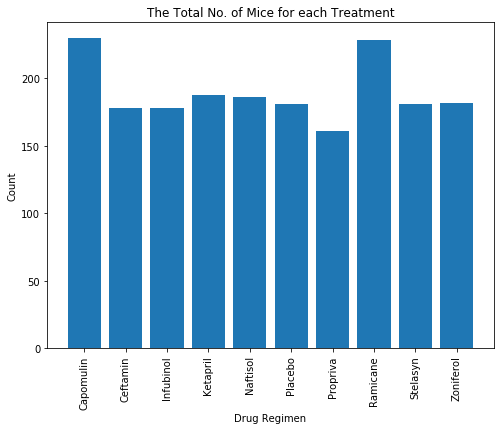

In [60]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

# prepare the drug regimen and mice count as the x and y for the plot 
drug_regimen = sum_stat_df.index.tolist()
mice_count = drug_count_df["Count"].tolist()

# configure the x width and x,y parameter for the graph
x_axis = np.arange(len(drug_regimen))
plt.figure(figsize=(8,6))
plt.bar(x_axis, mice_count)

# Set a Title and labels
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drug_regimen,  rotation='vertical')
plt.title("The Total No. of Mice for each Treatment")
plt.ylabel("Count")
plt.xlabel("Drug Regimen")
plt.show()

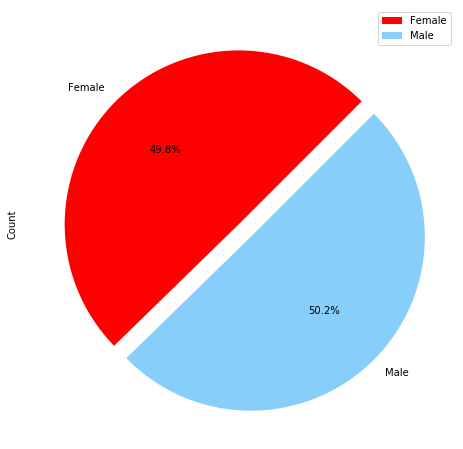

In [59]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_df = clean_df[["Mouse ID","Sex"]]
gender_df=gender_df.drop_duplicates(keep="first")

groupby_gender = gender_df.groupby(["Sex"])


# calculate count
g_count = groupby_gender["Mouse ID"].count()

# create a dataframe to hold Sex and Count
groupby_gender_df = pd.DataFrame({"Count": g_count
                           })

# set the colors
colors = ["red","lightskyblue"]

# set the explode value
explode=[0,0.1]

plot = groupby_gender_df.plot.pie(y="Count",explode = explode, figsize=(8,8), colors = colors, startangle=45, autopct="%1.1f%%")
plt.show()

/Users/theoscat/opt/anaconda3/envs/bcs/lib/python3.7/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.


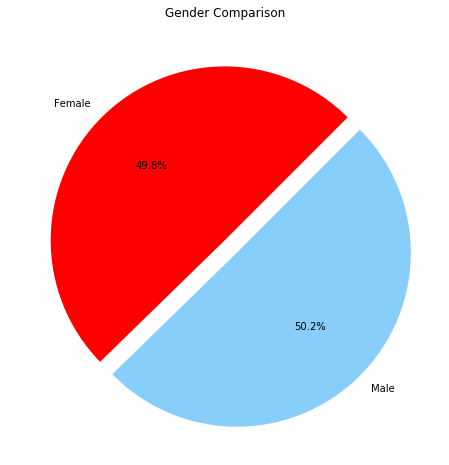

In [44]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# get the gender for labels
labels = groupby_gender_df.index

# get count of each gender
count = groupby_gender_df.values

# set the colors
colors = ["red","lightskyblue"]

# set the explode value
explode=[0,0.1]

# set pie chart size
plt.figure(figsize=(8,8))

# generate the pie chart
plt.pie(count, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", startangle=45)
plt.title("Gender Comparison")
plt.show()

## Quartiles, Outliers and Boxplots

In [45]:
drug_count_df = drug_count_df.reset_index()

In [46]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


# capture the max timepoint with Mouse ID
max_df = clean_df.groupby(["Mouse ID","Drug Regimen"])["Timepoint"].max()

# create a dataframe to hold Drug Regimen and Count
shortlist_drug_count_df = drug_count_df[drug_count_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol",  "Ceftamin"])]

shortlist_drug_count_df


# Start by getting the last (greatest) timepoint for each mouse
max_df = pd.DataFrame({"Timepoint": max_df
                           })

max_df=max_df.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

# shortlist the drug regimen
max_df = max_df[max_df["Drug Regimen"].isin(["Capomulin","Ceftamin", "Infubinol","Ramicane" ])]

# capture required columns from clean df
q_df = clean_df[["Mouse ID","Drug Regimen","Timepoint","Tumor Volume (mm3)"]]

# merge and show the tumor vol with max timepoint
merge_df=pd.merge(max_df, q_df, how="inner", on=["Mouse ID","Drug Regimen","Timepoint"]) 
merge_df = merge_df.sort_values(by=["Drug Regimen", "Mouse ID"])
merge_df

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
9,b128,Capomulin,45,38.982878
12,b742,Capomulin,45,38.939633
24,f966,Capomulin,20,30.485985
25,g288,Capomulin,45,37.074024
26,g316,Capomulin,45,40.159220
...,...,...,...,...
71,s508,Ramicane,45,30.276232
77,u196,Ramicane,45,40.667713
87,w678,Ramicane,5,43.166373
94,y449,Ramicane,15,44.183451


In [47]:
# Put treatments into a list for for loop (and later for plot labels)
drug_regimen = ["Capomulin","Ceftamin", "Infubinol","Ramicane" ]

# Create empty list to fill with tumor vol data (for plotting)
t_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

# Locate the rows which contain mice on each drug and get the tumor volumes and add to t_vol list
for d_r in drug_regimen:
    t_vol_drug = merge_df["Tumor Volume (mm3)"].loc[merge_df["Drug Regimen"] == d_r]
    t_vol.append(t_vol_drug)
    
# Determine outliers using upper and lower bounds
    quartiles = t_vol_drug.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
# output the result for each drug regimen
    print(f"Result for {d_r}:")
    print(f"\tThe interquartile range is: {iqr}.")
    print(f"\tValues below {lower_bound} could be outliers.")
    print(f"\tValues above {upper_bound} could be outliers.\n")
    

Result for Capomulin:
	The interquartile range is: 7.781863460000004.
	Values below 20.70456164999999 could be outliers.
	Values above 51.83201549 could be outliers.

Result for Ceftamin:
	The interquartile range is: 15.577752179999997.
	Values below 25.355449580000002 could be outliers.
	Values above 87.66645829999999 could be outliers.

Result for Infubinol:
	The interquartile range is: 11.477135160000003.
	Values below 36.83290494999999 could be outliers.
	Values above 82.74144559000001 could be outliers.

Result for Ramicane:
	The interquartile range is: 9.098536719999998.
	Values below 17.912664470000003 could be outliers.
	Values above 54.30681135 could be outliers.



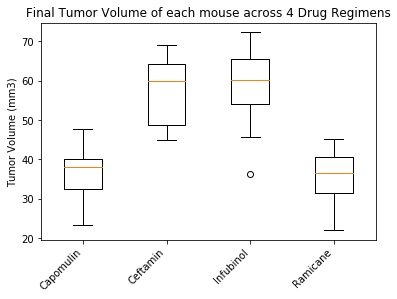

In [48]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig, ax = plt.subplots()
ax.set_title("Final Tumor Volume of each mouse across 4 Drug Regimens")
ax.set_xticklabels(drug_regimen, rotation=45,horizontalalignment="right")
ax.set_ylabel("Tumor Volume (mm3)")
ax.boxplot(t_vol)
plt.show()

## Line and Scatter Plots

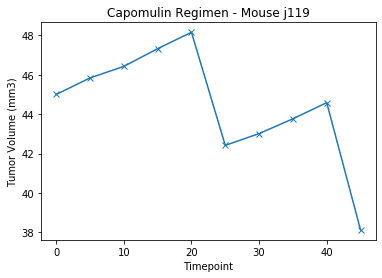

In [58]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

# capture all mice under Capomulin and select a lucky mouse
Capomulin_df = clean_df[["Mouse ID","Timepoint", "Tumor Volume (mm3)"]].loc[(clean_df["Drug Regimen"] == "Capomulin")]
random_mouse = Capomulin_df.sample(n=1)

# generate the dataframe with all timepoint and tumor vol
lucky_mouse = pd.merge(random_mouse["Mouse ID"], clean_df[["Mouse ID","Timepoint", "Tumor Volume (mm3)"]], on="Mouse ID")

# plot data
mouse_ID = lucky_mouse["Mouse ID"].values[0]
plt.plot(lucky_mouse["Timepoint"], lucky_mouse["Tumor Volume (mm3)"], marker = "x")
plt.title(f"Capomulin Regimen - Mouse {mouse_ID}")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint")
plt.show()

In [69]:
capo_stats

,Weight (g),Tumor Volume (mm3)
Mouse ID,,
b128,22,41.963636
b742,21,40.083699
f966,17,36.505973
g288,19,41.990097
g316,22,44.613344
i557,24,44.805810
i738,20,39.141053
j119,23,44.465236
j246,21,43.216925


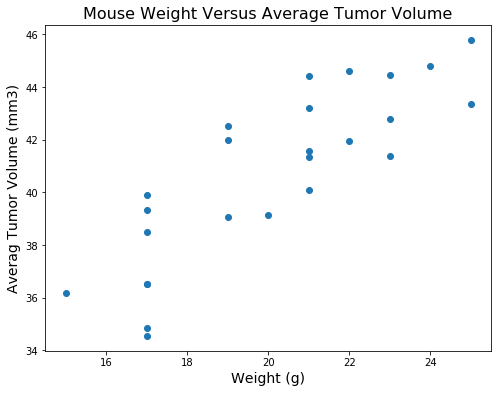

In [68]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
Capo_weight_df = clean_df[["Mouse ID", "Weight (g)","Tumor Volume (mm3)"]].loc[(clean_df["Drug Regimen"] == "Capomulin")]


capo_stats =Capo_weight_df.groupby(['Mouse ID']).mean()

fig, ax = plt.subplots(figsize=(8, 6))
marker_size=15
plt.scatter(capo_stats['Weight (g)'],capo_stats['Tumor Volume (mm3)'])
plt.title('Mouse Weight Versus Average Tumor Volume',fontsize =16)
plt.xlabel('Weight (g)',fontsize =14)
plt.ylabel('Averag Tumor Volume (mm3)',fontsize =14)
plt.show()


## Correlation and Regression

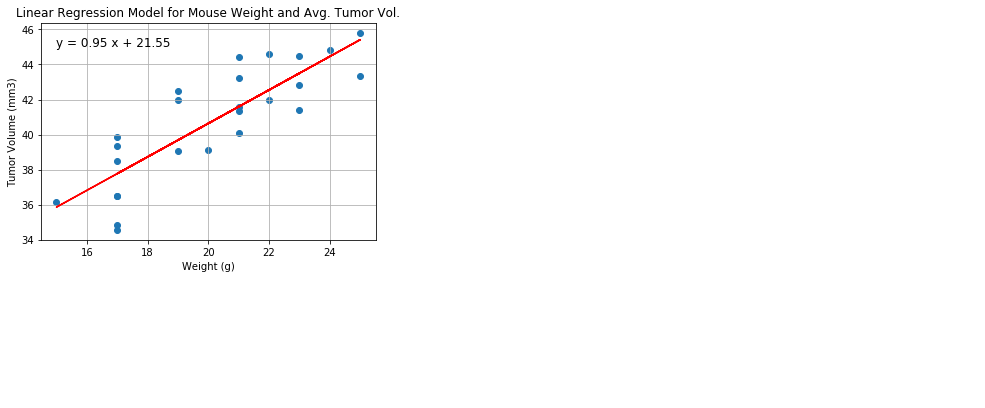

The r value is: 0.7088568047708717


In [81]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = capo_stats["Weight (g)"]
y_values = capo_stats["Tumor Volume (mm3)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))


plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15,45),fontsize=12,color="black")
plt.annotate(f"r^2= {round((rvalue**2),8)}",(42,25),fontsize=12)

plt.title('Linear Regression Model for Mouse Weight and Avg. Tumor Vol.')
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid(True)

plt.show()

# Get regression values
print(f"The r value is: {rvalue**2}")